In [1]:
import datetime
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Global Variables.
filepath = "/Users/Chrisdon/Documents/Training/Python/data/" # Change this to the path containing the sample data

# Pandas Objects
Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices. Three types of Pandas data structures: the Series, DataFrame, and Index.

## Series

A Pandas Series is a one-dimensional ndarray of indexed data with axis labels (including time series).

### Creating Series

In [3]:
# A Pandas Series is a one-dimensional array of indexed data
L = [0.25, 0.5, 0.75, 1.0] # List object
S = pd.Series(L) # Create a series using the list as input
print("Series Index ", S.index)
print("Series values ", S.values)
print("First 3 items in the series", list(S[0:3]))
print('*' * 80)

# This explicit index definition gives the Series object additional capabilities.
# For example,the index need not be an integer, but can consist of values of any desired type
S = pd.Series([0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd'],
              dtype=np.float)
print("Series with index ", S)
print(S["a":"c"])
print('*' * 80)
# Constructing a # Series object directly from a Python dictionary
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print("Series from Dictionary\n", population)
print('*' * 80)
print("Population of Texas ", population["Texas"])

Series Index  RangeIndex(start=0, stop=4, step=1)
Series values  [0.25 0.5  0.75 1.  ]
First 3 items in the series [0.25, 0.5, 0.75]
********************************************************************************
Series with index  a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
a    0.25
b    0.50
c    0.75
dtype: float64
********************************************************************************
Series from Dictionary
 California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
********************************************************************************
Population of Texas  26448193


### Indexing Series

In [4]:
# Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions.
np.random.seed(1)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s)
print('*' * 80)
print("s[0] = ", s[0])
print("s[c] = ", s['c'])
print("s[:3] =\n", s[:3])
print("s[s > s.median()] =\n",s[s > s.median()])
print("s[[4, 3, 1]] =\n", s[[4, 3, 1]])
print('*' * 80)
# Vectorized operations and label alignment with Series
print("s + s = ", s + s)
print("s * 2 = ", s * 2)
print("np.exp(s) =\n", np.exp(s))

a    1.624345
b   -0.611756
c   -0.528172
d   -1.072969
e    0.865408
dtype: float64
********************************************************************************
s[0] =  1.6243453636632417
s[c] =  -0.5281717522634557
s[:3] =
 a    1.624345
b   -0.611756
c   -0.528172
dtype: float64
s[s > s.median()] =
 a    1.624345
e    0.865408
dtype: float64
s[[4, 3, 1]] =
 e    0.865408
d   -1.072969
b   -0.611756
dtype: float64
********************************************************************************
s + s =  a    3.248691
b   -1.223513
c   -1.056344
d   -2.145937
e    1.730815
dtype: float64
s * 2 =  a    3.248691
b   -1.223513
c   -1.056344
d   -2.145937
e    1.730815
dtype: float64
np.exp(s) =
 a    5.075096
b    0.542397
c    0.589682
d    0.341992
e    2.375974
dtype: float64


## Dataframe

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects.

*class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)*

### Creating Dataframes

In [5]:
# Create a DataFrame from a two-dimensional array of data with any specified column and index names.
# If omitted, an integer index will be used for each:
np.random.seed(1)
df = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])
# use a # dictionary to construct a single two-dimensional object
df = pd.DataFrame(
    {"a" : [4 ,5, 6], "b" : [7, 8, 9], "c" : [10, 11, 12]},
    index = [1, 2, 3], dtype=np.int8)
print(df)
print('*' * 80)
# Constructing DataFrame from numpy ndarray or list
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
print(df2)
print('*' * 80)
# Constructing DataFrame from a numpy ndarray that has labeled columns:
data = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)],
                dtype=[("a", "i4"), ("b", "i4"), ("c", "i4")])
df3 = pd.DataFrame(data, columns=['c', 'a'])
print(df3)
print('*' * 80)
# Constructing a DataFrame from a series
series_dict = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
     "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    }
df4 = pd.DataFrame(series_dict)
print(df4)
print('*' * 80)
# Constructing a DataFrame from a NumPy structured or record array
data = np.zeros((4,), dtype={'names':('name', 'age', 'weight'),'formats':('U10', 'i4', 'f8')})
#data = np.zeros((4,), dtype=[("name", "U10"), ("age", "i4"), ("weight", "f8")])
data['name'] = ['Alice', 'Bob', 'Cathy', 'Doug']
data['age'] = [25, 45, 37, 19]
data['weight'] = [55.0, 85.5, 68.0, 61.5]
df5 = pd.DataFrame(data)
print(df5)

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
********************************************************************************
   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9
********************************************************************************
   c  a
0  3  1
1  6  4
2  9  7
********************************************************************************
   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
********************************************************************************
    name  age  weight
0  Alice   25    55.0
1    Bob   45    85.5
2  Cathy   37    68.0
3   Doug   19    61.5


### Column selection, addition, deletion

In [6]:
# use a dictionary to construct a single two-dimensional object containing population by state
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
states = pd.DataFrame({'population': population,  'area': area})
print (states)
print('*' * 80)
# DataFrame has a columns attribute, which is an Index object holding the column labels
print("Dataframe column attribute:",states.columns)
# DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute
# returns the Series object containing the areas
print(states['area'])
print(states.area)
print('*' * 80)
# Add a new derived column
states['density'] = states['population'] / states['area']
print(states)
# Drop the density column. 
x = states.drop(['density',], axis=1, inplace=False)
# Other methods for deleting columns: 
#    density = states.pop("density")
#    states.drop(columns=['density', 'area'])
print(x)
print('*' * 80)
# Drop the rows
x = states.drop(['Texas','Florida'], axis=0, inplace=False)
print(x)

            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995
********************************************************************************
Dataframe column attribute: Index(['population', 'area'], dtype='object')
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64
********************************************************************************
            population    area     density
California    38332521  423967   90.413926
Texas         26448193  695662   38.018740
New York      19651127  141297  139.076746
Florida       19552860  170312  114.806121
Illinois      12882135  149995   85.883763
            population    area
California    38332521  42396

### Indexing and selecting data

In [7]:
# examine the raw underlying data array using the values attribute
print(states.values)
print('*' * 80)
# Using the iloc and loc  indexer, we can index the underlying array as if it is a simple NumPy array
print(states.iloc[:3, :2]) # .iloc is primarily integer position based (from 0 to length-1 of the axis)
print(states.loc[:'Illinois', :'population']) # .loc is primarily label based
print('*' * 80)
# the loc indexer we can combine masking and fancy indexing as in the following
print(states.loc[states.density > 100, ['population', 'density']])
print('*' * 80)
# Any of these indexing conventions may also be used to set or modify values
states.iloc[0, 2] = 90
# indexing refers to columns, slicing refers to rows
print(states['California':'Florida'])
print(states[1:2])
print('*' * 80)
# transpose the full DataFrame to swap rows and columns
print(states.T)
print('*' * 80)
#  NumPy universal functions (ufunc) can be used with Pandas dataframe and series
np.random.seed(1)
pd.Series(np.random.randint(0, 10, 4))
pd.DataFrame(np.random.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
print(np.sin(df * np.pi / 4))
print(np.absolute(df))

[[3.83325210e+07 4.23967000e+05 9.04139261e+01]
 [2.64481930e+07 6.95662000e+05 3.80187404e+01]
 [1.96511270e+07 1.41297000e+05 1.39076746e+02]
 [1.95528600e+07 1.70312000e+05 1.14806121e+02]
 [1.28821350e+07 1.49995000e+05 8.58837628e+01]]
********************************************************************************
            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
            population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
********************************************************************************
          population     density
New York    19651127  139.076746
Florida     19552860  114.806121
********************************************************************************
            population    area     density
California    38332521  423967   90.000000
Texas         26448193  695662   38.018740
New York      19651127  14

### Operating on Data in Pandas

In [8]:
# Dropping null values
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]],
                  columns=['A', 'B', 'C'],
                  index=['a','b','c'])
df.dropna(inplace=True) # Drop rows with any cell containing NA
print(df)
print('*' * 80)
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]],
                  columns=['A', 'B', 'C'],
                  index=['a','b','c'])
df.dropna(inplace=True, axis='columns') # Drop columns with any cell containing NA
print(df)
print('*' * 80)
# specify how='all' to  only drop rows/columns that are all null values:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6],
                   [np.nan, None, np.nan]],
                  columns=['A', 'B', 'C'],
                  index=['a','b','c','d'])
df.dropna(inplace=True, how='all')
print(df)
print('*' * 80)
# For finer-grained control, the thresh parameter lets you specify a minimum number
# of non-null values for the row/column to be kept:
df.iloc[0, 2] = np.nan
print(df)
print('*' * 80)
df.dropna(axis='rows', thresh=2, inplace=True)
print(df)
print('*' * 80)
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6],
                   [np.nan, None, np.nan]],
                  columns=['A', 'B', 'C'],
                  index=['a','b','c','d'])
print(df.fillna(0))
print('*' * 80)
# specify a forward-fill to propagate the previous value forward. Specify bfill to propagate the next values backward
print(df.fillna(method='ffill', axis=0))

     A    B  C
b  2.0  3.0  5
********************************************************************************
   C
a  2
b  5
c  6
********************************************************************************
     A    B    C
a  1.0  NaN  2.0
b  2.0  3.0  5.0
c  NaN  4.0  6.0
********************************************************************************
     A    B    C
a  1.0  NaN  NaN
b  2.0  3.0  5.0
c  NaN  4.0  6.0
********************************************************************************
     A    B    C
b  2.0  3.0  5.0
c  NaN  4.0  6.0
********************************************************************************
     A    B    C
a  1.0  0.0  2.0
b  2.0  3.0  5.0
c  0.0  4.0  6.0
d  0.0  0.0  0.0
********************************************************************************
     A    B    C
a  1.0  NaN  2.0
b  2.0  3.0  5.0
c  2.0  4.0  6.0
d  2.0  4.0  6.0


### Pandas Hierarchical / Multi-level indexing

In [9]:
df = pd.DataFrame(np.random.rand(4, 2),
 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
 columns=['data1', 'data2'])
print(df)
print('*' * 80)
data = {('California', 2000): 33871648, 
        ('California', 2010): 37253956, 
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561, 
        ('New York', 2000): 18976457,  
        ('New York', 2010): 19378102}
print(pd.Series(data))

        data1     data2
a 1  0.913962  0.457205
  2  0.430699  0.939128
b 1  0.778389  0.715971
  2  0.802758  0.092801
********************************************************************************
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64


In [10]:
# Explicit MultiIndex constructors
# construct the MultiIndex from a simple list of arrays, giving the index values within each level
print(pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]))
print('*' * 80)
# construct it from a list of tuples, giving the multiple index values of each point:
print(pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)]))
print('*' * 80)
# construct it from a Cartesian product of single indices
print(pd.MultiIndex.from_product([['a', 'b'], [1, 2]]))
print('*' * 80)
# Create a dataframe with rows and columns that have multiple levels of indices
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
print(health_data)
print('*' * 80)
# Index the top-level column by the person’s name and get a full Data Frame containing just that person’s information
print(health_data['Guido','HR'])
print('*' * 80)
print(health_data['Guido','HR'].loc[2013])
print('*' * 80)
print(health_data['Guido','HR'].loc[2013,1])
print('*' * 80)
print(health_data[health_data>40])
print('*' * 80)
print(health_data.iloc[:2, :2])
idx = pd.IndexSlice
print(health_data.loc[idx[:, 1], idx[:, 'HR']])
print('*' * 80)
print(health_data.unstack(level=1))
print('*' * 80)
# Data Aggregations on Multi-Indices
data_mean = health_data.mean(level='year')
print(data_mean)
print('*' * 80)
# By further making use of the axis keyword, we can take the mean among levels on
# the columns as well:
print(data_mean.mean(axis=1, level='type'))

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
********************************************************************************
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
********************************************************************************
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
********************************************************************************
subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      48.0  37.1  41.0  37.4  35.0  36.9
     2      46.0  38.7  28.0  38.7  31.0  36.1
2014 1      41.0  36.5  32.0  36.9  52.0  38.2
     2      32.0  35.2  28.0  36.9  29.0  37.1
********************************************************************************
year  visit
2013  1        41.0
      2  

### Combining Datasets: Concat and Append

In [11]:
def make_df(cols, ind):
    """Create a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)
df = make_df('ABC', range(3))
print(df)
print('*' * 80)
# simple concatenation of Series
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
a = pd.concat([ser1, ser2])
print(a)
print('*' * 80)
# concatenate dataframes. By default, the concatenation takes place row-wise
# within the DataFrame (i.e.,axis=0)
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
#print(df1); print(df2); 
print(pd.concat([df1, df2]))
print('*' * 80)
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
#print(df3); print(df4); 
print(pd.concat([df3, df4], axis=1))
print('*' * 80)
# The append() method
print(df1.append(df2))

    A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2
********************************************************************************
1    A
2    B
3    C
4    D
5    E
6    F
dtype: object
********************************************************************************
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
********************************************************************************
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
********************************************************************************
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


### Combining Datasets: Merge and Join

The pd.merge() function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins.

In [12]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)
# use the pd.merge() function to combine this information into a single DataFrame
df3 = pd.merge(df1, df2)
print(df3)
print('*' * 80)
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); 
print(pd.merge(df3, df4))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
********************************************************************************
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


#### Many-to-many joins: If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.

In [13]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print(df1); print(df5); 
print('*' * 80)
print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
********************************************************************************
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


#### Specification of the Merge Key

the default behavior of pd.merge() is it looks for one or more matching column names between the two inputs,and uses this as the key. However, often the column names will not match so nicely, and pd.merge() provides a variety of options for handling this.

In [14]:
print(pd.merge(df1, df2, on='employee'))
print('*' * 80)
# Merging two datasets with different column names using the left_on and right_on keywords
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print('*' * 80)
print(pd.merge(df1, df3, left_on="employee", right_on="name"))
print('*' * 80)
# Remove redundant column
print(pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1))
print('*' * 80)

# merge on an index instead of merging on a column
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)
print('*' * 80)
print(pd.merge(df1a, df2a, left_index=True, right_index=True))
print('*' * 80)
# DataFrames implement the join() method, which performs a merge that defaults to joining on indices
print(df1a.join(df2a))
print('*' * 80)
# Specifying Set Arithmetic for Joins
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print(df6); print(df7);
print('*' * 80)
print(pd.merge(df6, df7, how='inner'))
print('*' * 80)
print(pd.merge(df6, df7, how='outer'))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
********************************************************************************
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
********************************************************************************
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000
********************************************************************************
  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000
********************************

### Dealing with overlapping Column Names

In [15]:
# the merge function automatically appends a suffix _x or _y to the column names to make the output unique.
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8); print(df9);
print('*' * 80)
print(pd.merge(df8, df9, on="name"))
print('*' * 80)
# specify a custom suffix using the suffixes
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
********************************************************************************
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2
********************************************************************************
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


### Data Wrangling with Pandas Example

In [16]:
pop = pd.read_csv(filepath+'state-population.csv')
areas = pd.read_csv(filepath+'state-areas.csv')
abbrevs = pd.read_csv(filepath+'state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())
print('*' * 80)
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
print(merged.head())
print('*' * 80)
# Check for mismatches
print(merged.isnull().any()) # some of the population information is null
print('*' * 80)
print(merged[merged['population'].isnull()].head()) # There is no Puerto Rico data prior to the year 2000
# Entries that did not have corresponding entries in the abbrevs key
print(merged.loc[merged['state'].isnull(), 'state/region'].unique()) 
# Fill in appropriate entries:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()
# No more nulls in the state column
final = pd.merge(merged, areas, on='state', how='left')
final.head()
print('*' * 80)
# check for nulls to see whether other mismatches remain in the dataframe
print(final.isnull().any())
print('*' * 80)
# There are nulls in the area column; show see which regions were ignored
print(final['state'][final['area (sq. mi)'].isnull()].unique())
print('*' * 80)
# drop the null values since the population density of the entire United States is not relevant to the anaysis
final.dropna(inplace=True)
# Store the data corresponding with the year 2000, and the total population in a new dataframe
data2010 = final.query("year == 2010 & ages == 'total'")
print(data2010.head())
print('*' * 80)
# compute the population density and display it in order.
data2010.set_index('state', inplace=True) # re-index the dataframe on the state
print(data2010.head())
print('*' * 80)
# Calculate density and add the derived column to the dataframe (this is an example of data engineering)
density = data2010['population'] / data2010['area (sq. mi)']
# Sort by ranking of US states by 2010 population density, (# of residents per square mile)
density.sort_values(ascending=False, inplace=True)
print(density.head())
print('*' * 80)
print(density.tail()) # show lowest ranking by density

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA
********************************************************************************
  state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama
*************************

### Aggregation and Grouping Example

In [17]:
# Load the Planets Dataframe from the seaborn library
planets = sns.load_dataset('planets')
print(planets.shape)
print('*' * 80)
print(planets.head())
print('*' * 80)
# Simple Aggregation in Pandas
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
print(ser.sum())
print('*' * 80)
print(ser.mean())
print('*' * 80)
# by default the aggregates return results within each column
df = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
print(df.mean())
print('*' * 80)
print(df.mean(axis='columns'))
print('*' * 80)
# compute several common aggregates for each column and returns the result
print(planets.dropna().describe())
print('*' * 80)
# GroupBy: Split, Apply, Combine
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
print(df.groupby('key').sum())
print('*' * 80)
print(planets.groupby('method')['orbital_period'].median())

(1035, 6)
********************************************************************************
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
********************************************************************************
2.811925491708157
********************************************************************************
0.5623850983416314
********************************************************************************
A    0.477888
B    0.443420
dtype: float64
********************************************************************************
0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64
************************

In [18]:
# The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))
print('*' * 80)
# Dispatch methods are applied to each individual group, and the results are then combined within GroupBy
print(planets.groupby('method')['year'].describe().unstack())

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)
********************************************************************************
       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transi

### Aggregation
The aggregate() method takes a string, a function, or a list, and compute all the aggregates at once

In [19]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6), 'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
print(df.groupby('key').aggregate(['min', np.median, max]))
print('*' * 80)
print(df.groupby('key').aggregate({'data1': 'min','data2': 'max'}))

    data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9
********************************************************************************
     data1  data2
key              
A        0      5
B        1      7
C        2      9


### Filter
A filtering operation allows you to drop data based on the group properties. The filter() function should return a Boolean value specifying whether the group passes the filtering.

In [20]:
def filter_func(x):
    return x['data2'].std() > 4

print(df); 
print('*' * 80)
print(df.groupby('key').std());
print('*' * 80)
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
********************************************************************************
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
********************************************************************************
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


### Transform
While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine

In [21]:
# This example centers the data by subtracting the group-wise mean
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### Apply
The apply() method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar

In [22]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

print(df.groupby('key').apply(norm_by_data2))

  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


### Specifying the split key
The key can be any series or list with a length matching that of the DataFrame

In [23]:
L = [0, 1, 0, 1, 2, 0]
print(df); 
print('*' * 80)
print(df.groupby(L).sum())
print('*' * 80)
print(df.groupby(df['key']).sum())
print('*' * 80)
# Another method is to provide a dictionary that maps index values to the group keys:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2)
print('*' * 80)
print(df2.groupby(mapping).sum())
print('*' * 80)
# you can pass any Python function that will input the index value and output the group:
print(df2.groupby(str.lower).mean())
print('*' * 80)
print(df2.groupby([str.lower, mapping]).mean())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
********************************************************************************
   data1  data2
0      7     17
1      4      3
2      4      7
********************************************************************************
     data1  data2
key              
A        3      8
B        5      7
C        7     12
********************************************************************************
     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
********************************************************************************
           data1  data2
consonant     12     19
vowel          3      8
********************************************************************************
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0
*********************

### Grouping example

In [24]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

In [25]:
titanic = sns.load_dataset('titanic') # Load the Titanic dataframe
print(titanic.groupby('sex')[['survived']].mean())
print('*' * 80)
print(titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack())
print('*' * 80)
# Pivot Table Syntax: this is equivalent to the preceding operation, but easier to understand
print(titanic.pivot_table('survived', index='sex', columns='class'))

        survived
sex             
female  0.742038
male    0.188908
********************************************************************************
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447
********************************************************************************
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


### Multilevel pivot tables

In [26]:
# bin the age using the pd.cut function:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')
# pd.qcut automatically computes quantiles
fare = pd.qcut(titanic['fare'], 2)
print(titanic.pivot_table('survived', ['sex', age], [fare, 'class']))
print('*' * 80)
print(titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'}))
print('*' * 80)

# compute totals along each grouping using the margins keyword
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308  
********************************************************************************
              fare                       survived             
class        First     Second      Third    First Second Third
sex     

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Example: Plotting Birthrate Data

   year  month  day gender  births  decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


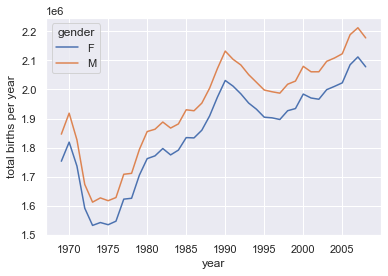

In [27]:
births = pd.read_csv(filepath + 'births.csv')
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())
sns.set_theme() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

### Further data exploration of the Births Dataframe
a few more interesting features we can extract from this dataset using Pandas

decade            1960         1970         1980
dayofweek                                       
Mon        5063.826923  4689.097701  5276.907249
Tues       5286.096154  4885.252399  5503.842553
Wed        5074.622642  4750.376200  5367.642553
Thur       4978.288462  4696.923372  5333.485106
Fri        5107.884615  4782.095785  5393.087234
Sat        4651.057692  4207.784483  4483.901064
Sun        4342.346154  3979.278736  4308.120469
********************************************************************************


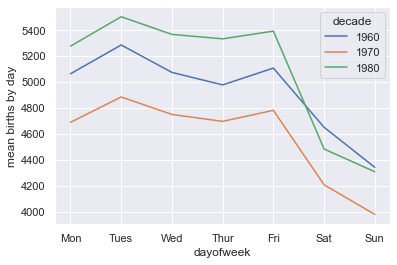

In [28]:
# remove outliers using a robust sigma-clipping operation
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
# estimate the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution.
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)
# combine the day, month, and year to create a Date index to quickly compute the weekday corresponding to each row:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births_per_day = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')

daynumber = [0,1,2,3,4,5,6]
weekday = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
births_per_day = births_per_day.rename(index=dict(zip(daynumber,weekday)))

# plot births by weekday for several decades
print(births_per_day)
print('*' * 80)
births_per_day.plot() # births are slightly less common on weekends than on weekdays.
plt.ylabel('mean births by day');

            year  month  day gender  births  decade  dayofweek
1969-01-01  1969      1    1      F    4046    1960          2
1969-01-01  1969      1    1      M    4440    1960          2
1969-01-02  1969      1    2      F    4454    1960          3
1969-01-02  1969      1    2      M    4548    1960          3
1969-01-03  1969      1    3      F    4548    1960          4


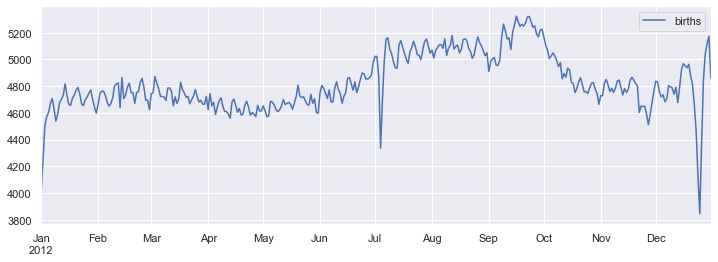

In [29]:
print(births.head())
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()
births_by_date.index = [datetime.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax); # note tge dip in birthrate on US holidays

### Vectorized String Operations

In [30]:
data = ['peter', 'Paul', 'MARY', None, 'gUIDO'] # List containing None
data = [s.capitalize() for s in data if s is not None] # Ignore None to avoid exception
print(data)
print('*' * 80)
names = pd.Series(data) # convert list to series
names.str.capitalize() #  capitalize all the entries ignoring missing values
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
# Methods similar to Python string methods
print(monte.str.lower())
print('*' * 80)
print(monte.str.len())
print('*' * 80)
print(monte.str.startswith('T'))
print('*' * 80)
print(monte.str.split())

['Peter', 'Paul', 'Mary', 'Guido']
********************************************************************************
0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object
********************************************************************************
0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64
********************************************************************************
0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool
********************************************************************************
0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object


### Regular expressions

In [31]:
# extract the first name from each by asking for a contiguous group of characters at the beginning of each element
print(monte.str.extract('([A-Za-z]+)'))
print('*' * 80)
# finding all names that start and end with a consonant, making use of the start-of-string (^)
# and end-of-string ($) regular expression characters:
print(monte.str.findall(r'^[^AEIOU].*[^aeiou]$'))
print('*' * 80)
# Vectorized item access and slicing
print(monte.str[0:3])
print('*' * 80)
print(monte.str.split().str.get(-1))
print('*' * 80)
# get_dummies() method is useful for encoding operations.
full_monte = pd.DataFrame({'name': monte, 'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
print(full_monte['info'].str.get_dummies('|'))

         0
0   Graham
1     John
2    Terry
3     Eric
4    Terry
5  Michael
********************************************************************************
0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object
********************************************************************************
0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object
********************************************************************************
0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object
********************************************************************************
   A  B  C  D
0  0  1  1  1
1  0  1  0  1
2  1  0  1  0
3  0  1  0  1
4  0  1  1  0
5  0  1  1  1


https://pandas.pydata.org/docs/user_guide/scale.html